In [105]:
#TITLE: A Machine Learning Approach for the Classification of Cardiac Arrhythmia
#STUDENT NAME: João Pedro da Silva Esteves
#JMBAG: 

1. Imports needed in order to execute the python code

In [106]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# import classification algorithms 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'

2. First, get data frame from data's URL, with features named from 0 to 279, using pandas' read_csv()
Feature 279 is actually the 'targets'

In [107]:
lst = range(0,280)
raw_data = pd.read_csv(url, names = lst, na_values='?')

3. Separate the features from the targets

In [108]:
ft_data = raw_data.loc[:, lst[:-1]].values
target_data = raw_data.loc[:, lst[-1]].values

4. Standardize the features' numerical data

In [109]:
ft_data = StandardScaler().fit_transform(ft_data)


5. Replace NaN values using imputation with mean values

In [110]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
ft_data = imp.fit_transform(ft_data)

6. Determine the number of features needed to get a variance rate of 99%

In [111]:
pca = PCA(0.99)
pca.fit_transform(ft_data)
len(pca.explained_variance_ratio_)

154

7. According to the paper, reducing the number of features to 150 features is enough (150 is close to 154 features previously obtained)


In [112]:
pca = PCA(n_components = 150)
principal_components = pca.fit_transform(ft_data)

lst = range(150)
principal_ft_data = pd.DataFrame(data = principal_components, columns = lst)
target_data_df = pd.DataFrame(target_data)

8. Get a training set and a test

In [113]:
test_data_size = 125
total_data_size = 452
training_ft_set, test_ft_set, training_target_set, test_target_set = train_test_split(principal_ft_data, np.ravel(target_data_df), test_size = test_data_size/total_data_size, random_state = 25)

9. Now, 4 algorithms for data classification will be used and compared later on.<br>9.1. SVM (Support Vector Machines) Algorithm. CV parameter refers to KFolds with k = 5.

In [114]:
# #Start by training without tuning hyperparameters
# model = SVC()
# model.fit(training_ft_set, training_target_set)
# #print prediction results
# predictions = model.predict(test_ft_set)
# print(classification_report(test_target_set, predictions))
# print("Accuracy SVM no tuning:",metrics.accuracy_score(test_target_set, predictions))

#Now we should use the model with hyperparameters turning

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(training_ft_set, training_target_set)

#print gridsearchcv and prediction results
print(f"Best hyperparameters are: {grid.best_params_}")
grid_predictions = grid.predict(test_ft_set)
print(classification_report(test_target_set, grid_predictions))
SVM_accuracy_result = metrics.accuracy_score(test_target_set, grid_predictions)
print("Accuracy SVM with tuning:", SVM_accuracy_result)


Best hyperparameters are: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           1       0.71      0.94      0.81        72
           2       0.43      0.30      0.35        10
           3       1.00      1.00      1.00         3
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         2
           6       1.00      0.10      0.18        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.75      0.86         4
          10       1.00      0.50      0.67        18
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.70       125
   macro avg       0.43      0.31      0.34       125
weighted avg       0.73      0.70      0.66       125

Accuracy

9.2. Logistic Regression Algorithm. CV parameter refers to KFolds with k = 5.

In [115]:
#Start by training without tuning hyperparameters
# model = LogisticRegression()
# model.fit(training_ft_set, training_target_set)
# #print prediction results
# predictions = model.predict(test_ft_set)
# print(classification_report(test_target_set, predictions))
# print('Accuracy Log Reg no tuning: {:.5f}'.format(model.score(test_ft_set, test_target_set)))

#Now we should use the model with hyperparameters tuning

param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(training_ft_set, training_target_set)

#print gridsearchcv and prediction results
print(f"Best hyperparameters are: {grid.best_params_}")
grid_predictions = grid.predict(test_ft_set)
print(classification_report(test_target_set, grid_predictions))
LogReg_accuracy_result = metrics.accuracy_score(test_target_set, grid_predictions)
print("Accuracy Log Reg with tuning:", LogReg_accuracy_result)


Best hyperparameters are: {'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           1       0.74      0.97      0.84        72
           2       0.50      0.40      0.44        10
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.67      0.20      0.31        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         4
          10       0.91      0.56      0.69        18
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.73       125
   macro avg       0.40      0.30      0.33       125
weighted avg       0.70      0.73      0.69       125

Accuracy Log Reg with tuning: 0.728


9.3. KNN (K-Nearest Neighbors) Algorithm. CV parameter refers to KFolds with k = 5.

In [116]:
# #Start by training without tuning hyperparameters
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(training_ft_set, training_target_set)
# #print prediction results
# predictions = classifier.predict(test_ft_set)
# print(classification_report(test_target_set, predictions))
# print("Accuracy KNN no tuning:", metrics.accuracy_score(test_target_set, predictions))

#Now we should use the model with hyperparameters tuning

param_grid={"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(training_ft_set, training_target_set)

#print gridsearchcv and prediction results
print(f"Best hyperparameters are: {grid.best_params_}")
grid_predictions = grid.predict(test_ft_set)
print(classification_report(test_target_set, grid_predictions))
KNN_accuracy_result = metrics.accuracy_score(test_target_set, grid_predictions)
print("Accuracy KNN with tuning:", KNN_accuracy_result)

Best hyperparameters are: {'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        72
           2       0.67      0.20      0.31        10
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.25      0.40         4
          10       1.00      0.17      0.29        18
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.64       125
   macro avg       0.36      0.19      0.21       125
weighted avg       0.62      0.64      0.54       125

Accuracy KNN with tuning: 0.64


9.4. RF (Random Forest) Algorithm. CV parameter refers to KFolds with k = 5.

In [117]:
#Start by training without tuning hyperparameters
# classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
# classifier.fit(training_ft_set, training_target_set)
# #print prediction results
# predictions = classifier.predict(test_ft_set)
# print(classification_report(test_target_set, predictions))
# print("Accuracy RF no tuning:", metrics.accuracy_score(test_target_set, predictions))

#Now we should use the model with hyperparameters tuning

classifier = RandomForestClassifier(random_state=42)
param_grid = {'max_depth': [5,10,20], 'min_samples_leaf': [3,4,10,100],'n_estimators': [50,100,200,300]}
grid = GridSearchCV(classifier, param_grid, refit=True, cv=5, verbose=0)
grid.fit(training_ft_set, training_target_set)

#print gridsearchcv and prediction results
print(f"Best hyperparameters are: {grid.best_params_}")
grid_predictions = grid.predict(test_ft_set)
print(classification_report(test_target_set, grid_predictions))
RF_accuracy_result = metrics.accuracy_score(test_target_set, grid_predictions)
print("Accuracy RF with tuning:", RF_accuracy_result)

Best hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

           1       0.61      1.00      0.75        72
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.60      0.17      0.26        18
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.60       125
   macro avg       0.10      0.10      0.08       125
weighted avg       0.43      0.60      0.47       125

Accuracy RF with tuning: 0.6


10. Plot the classifiers' accuracies in a bar graph

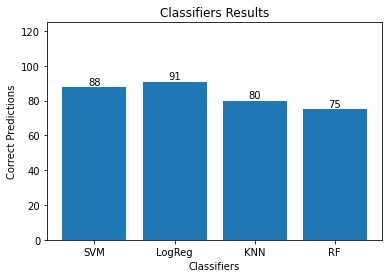

In [118]:
fig, ax = plt.subplots()
index = [0,1,2,3]
x = ['SVM','LogReg','KNN','RF']
y = [SVM_accuracy_result*test_data_size,LogReg_accuracy_result*test_data_size,KNN_accuracy_result*test_data_size,RF_accuracy_result*test_data_size]
ax.bar(index,y)
ax.set_xticks(index)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0])
plt.title('Classifiers Results')
plt.xlabel('Classifiers')
plt.ylabel('Correct Predictions')
plt.ylim(0, len(test_target_set))
plt.show()